In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [4]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=20

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 0 0 1 0 0 1 1 2 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 2]


(32, 256, 256, 3)
[0 2 0 1 1 2 2 1 0 2 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


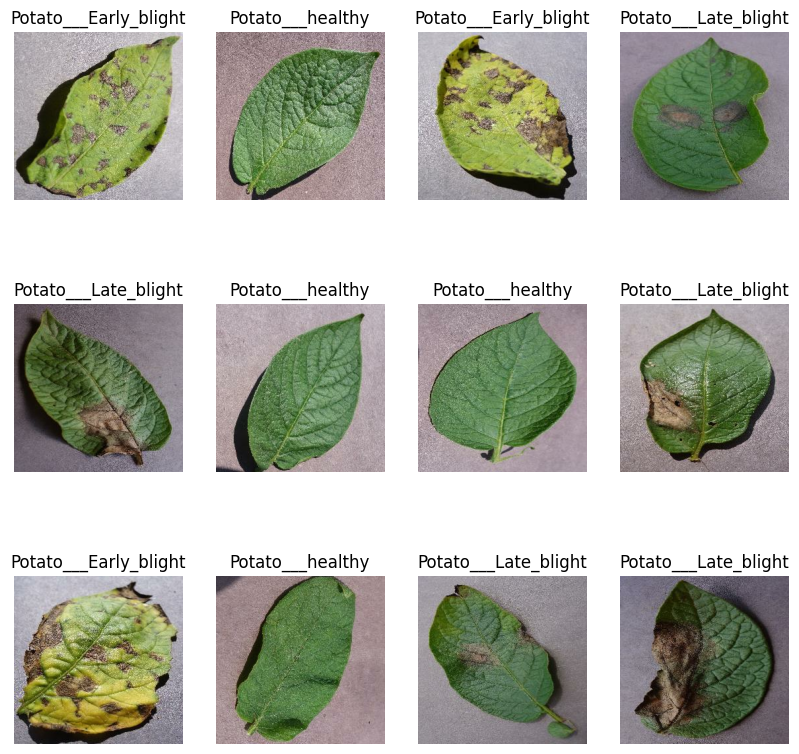

In [8]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.title(class_names[labels_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

In [11]:
"""
    Training data= 80%
    Testing data= 20%
        Validation data= 10%
        Test data=10%
"""


train_size=0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds=dataset.take(54)
len(train_ds)

54

In [13]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [34]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [35]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [36]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [37]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    assert(train_split+test_split+val_split)==1

    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [38]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [39]:
len(train_ds)

54

In [40]:
len(val_ds)

6

In [41]:
len(test_ds)

8

In [42]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [43]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [44]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [45]:
# Define input shape WITHOUT batch size for layer definition
input_shape_for_layers = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # No BATCH_SIZE here
n_classes = 3

# Method 1: Add Input layer explicitly
model = models.Sequential([
    layers.Input(shape=input_shape_for_layers),  # Explicit Input layer
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [46]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [48]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 852ms/step - accuracy: 0.4472 - loss: 0.9578 - val_accuracy: 0.6042 - val_loss: 0.8442
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 817ms/step - accuracy: 0.6506 - loss: 0.8337 - val_accuracy: 0.7604 - val_loss: 0.5691
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 43s 802ms/step - accuracy: 0.8132 - loss: 0.4566 - val_accuracy: 0.8125 - val_loss: 0.5191
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 805ms/step - accuracy: 0.8519 - loss: 0.3827 - val_accuracy: 0.8646 - val_loss: 0.3557
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9064 - loss: 0.2347 - val_accuracy: 0.8646 - val_loss: 0.3271
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 808ms/step - accuracy: 0.8996 - loss: 0.2508 - val_accuracy: 0.8438 - val_loss: 0.3169
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 823ms/step - accuracy: 0.9164 - loss: 0.2197 - val_accuracy: 0.9271 - val_loss: 0.1732
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 820ms/step - accuracy: 0.9313 - loss: 0.1858 - val_accurac

In [49]:
scores=model.evaluate(test_ds)
scores

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step - accuracy: 0.9321 - loss: 0.1426


[0.16620267927646637, 0.921875]

In [50]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [51]:
history.history['loss']

[0.912231981754303,
 0.7655776143074036,
 0.44091761112213135,
 0.3414473831653595,
 0.24597154557704926,
 0.24969862401485443,
 0.18686172366142273,
 0.22371423244476318,
 0.1592603325843811,
 0.17237479984760284,
 0.1553834080696106,
 0.1704002469778061,
 0.14534059166908264,
 0.13963451981544495,
 0.11773461103439331,
 0.11672674119472504,
 0.11685150861740112,
 0.091421939432621,
 0.10848964005708694,
 0.08327542990446091]

In [52]:
history.history['accuracy']

[0.47685185074806213,
 0.6915509104728699,
 0.8148148059844971,
 0.8709490895271301,
 0.9079861044883728,
 0.8993055820465088,
 0.9253472089767456,
 0.9126157164573669,
 0.9398148059844971,
 0.9375,
 0.9357638955116272,
 0.9403935074806213,
 0.9432870149612427,
 0.9456018805503845,
 0.9583333134651184,
 0.9537037014961243,
 0.9548611044883728,
 0.9670138955116272,
 0.9554398059844971,
 0.96875]

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

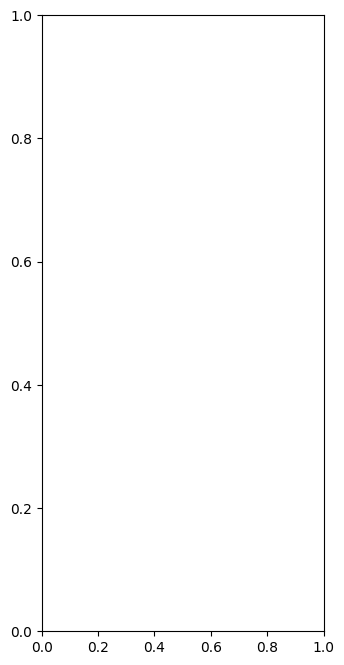

In [53]:
from matplotlib import pyplot as pyplot

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot

First image to predict: 
Actual Label:  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
Predicted label:  Potato___Early_blight


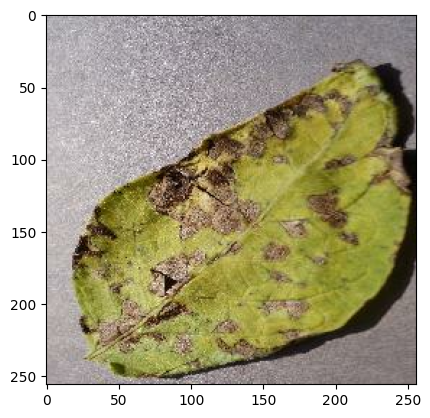

In [ ]:
import numpy as np
for image_batch,labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype("uint8")

    print("First image to predict: ")
    plt.imshow(first_image)
    print("Actual label: ",class_names[labels_batch[0].numpy()])

    batch_prediction=model.predict(image_batch)
    print("Predicted label: ",class_names[np.argmax(batch_prediction[0])])


In [55]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


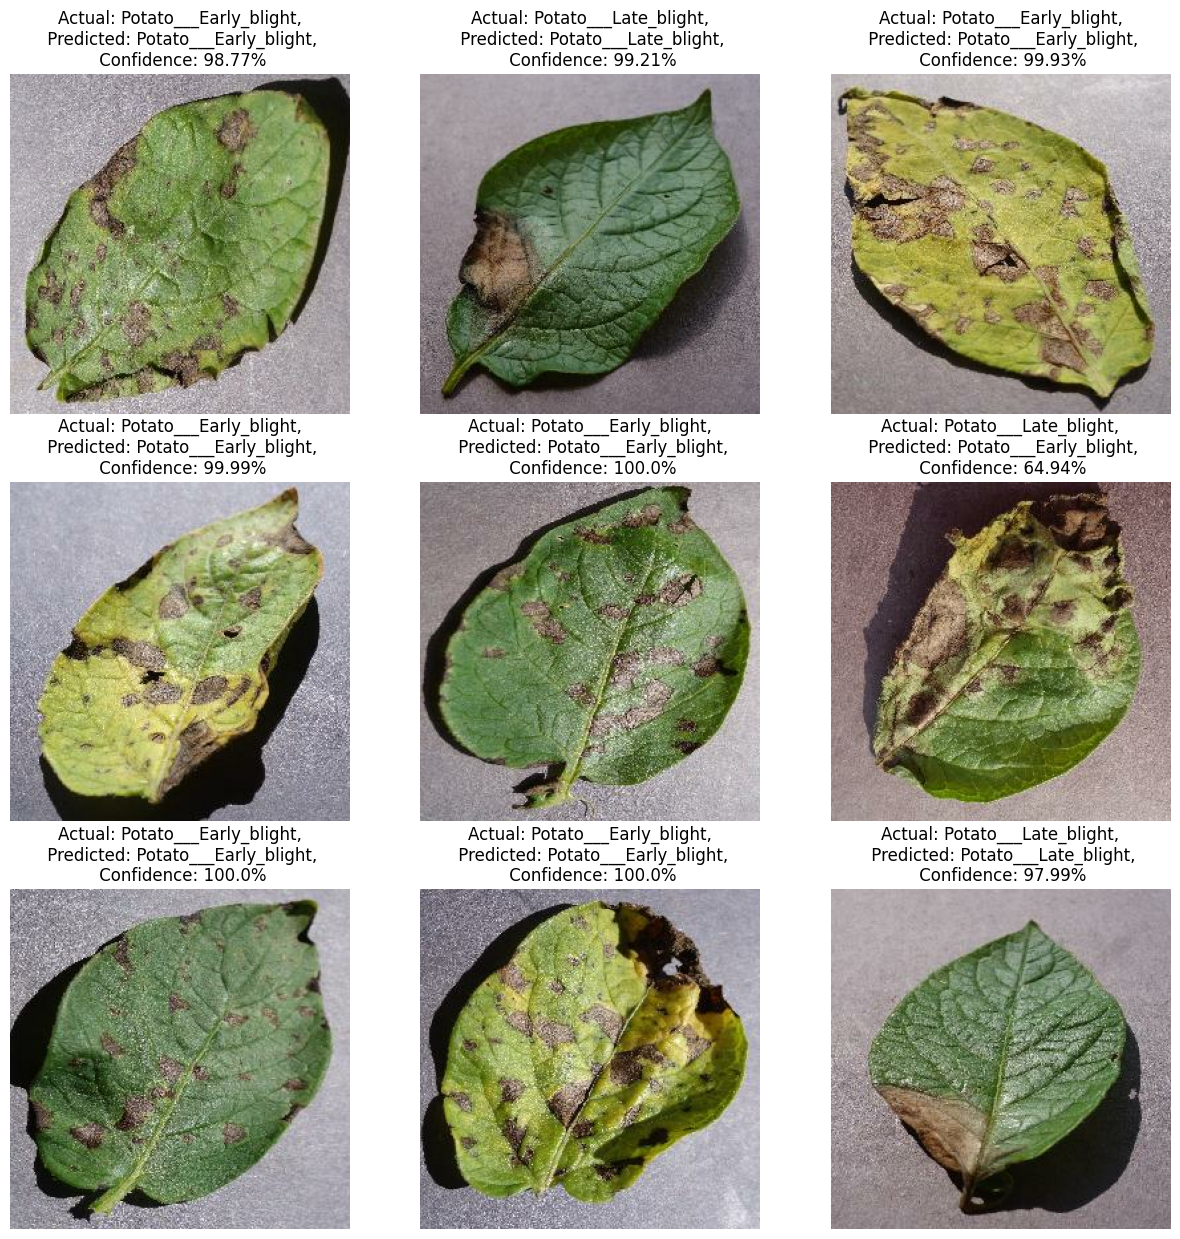

In [56]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())

        actual_class=class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")

In [ ]:
model_version=1
# model.save(f"../model/{model_version}")
model.export(f"../model/{model_version}")

TypeError: cannot pickle 'module' object

In [63]:
import pickle
pickle.dump(model,open("disease_detecter.pkl","wb"))

In [64]:
# Save in .keras format (recommended in Keras 3)
model.save("../saved_models/2.keras")


In [65]:
model.save("../saved_models/3.keras")